<font color="white">.</font> | <font color="white">.</font> | <font color="white">.</font>
-- | -- | --
![NASA](http://www.nasa.gov/sites/all/themes/custom/nasatwo/images/nasa-logo.svg) | <h1><font size="+3">ASTG Python Courses</font></h1> | ![NASA](https://www.nccs.nasa.gov/sites/default/files/NCCS_Logo_0.png)
 
---

<CENTER>
<H1 style="color:red">
An Introduction to netCDF4 Python
</H1>
</CENTER>

# <font color='red'> Useful References </font>

* <A HREF="http://pyhogs.github.io/intro_netcdf4.html">Create and read netCDF files</A>
* <A HREF="https://unidata.github.io/netcdf4-python/netCDF4/index.html">netCDF4 module</A>
* <a href="https://annefou.github.io/metos_python/07-LargeFiles/">Handling very large files in Python</a>

## <font color="red"> Scientific Data</font>

* N‐dimensional arrays and metadata:
* Measurements at specific time, location,condition
       – Physics: temperature, pressure
       – Chemistry: reaction speed
       – Biology: type (species, cell types, nucleotides)
       – Economics: price
       – Algorithmics: program time and space
       – Networking: network activity
       – Robotics: movements
     
**Requirements**

+ Compact storage: compression
+ Fast I/O: parallel, partial, random access
+ Portability: transporting data between computers
+ Tools for manipulating data: reorganizing, aggregating, subsetting, converting,visualizing
+ Easy API in many languages: C, C++, Fortran, Java, Matlab, Perl, Python, R, ...

## <font color="red"> What We Will Cover </font>
* Opening a file
* Dimension
* Variables
* Attributes
* Writing data
* Creating groups
* Reading data

## <font color='red'> What is netCDF?</font>

**Overview**

* The Network Common Data Form, or netCDF, is an interface to a library of data access functions for storing and retrieving data in the form of arrays.
* NetCDF is an abstraction that supports a view of data as a collection of self-describing, portable objects that can be accessed through a simple interface.
* All operations to access and manipulate data in a netCDF dataset must use only the set of functions provided by the interface.
* Array values may be accessed directly, without knowing details of how the data are stored.
* NetCDF supports efficient access to small subsets of large datasets.

**Portability**

* The netCDF library is supported for various Linux/UNIX operating systems as well as MS Windows.
* APIs written for Fortran 77/90, C, C++, Java

**Conventions**

* The mere use of netCDF is not sufficient to make data "self-describing" and meaningful to both humans and machines. 
* By using a set of conventions, a data producer is more likely to produce files that can be easily shared within the research community, and that contain enough details to be useful as a long-term archive. 
* The names of variables and dimensions should be meaningful and conform to any relevant conventions.
* It is important to use all the relevant standard attributes using the relevant conventions.



## <font color='red'> What is netCDF4 Python?</font>

* Python interface to the netCDF version 4 library.
* **Can read and write files in both the new netCDF 4 and the netCDF 3 formats**.
* Can create files that are readable by HDF5 utilities.
* Relies on NumPy arrays.

-----

**<font color="blue">Uncomment the cell below if you are in Google Colab</font>**

In [ ]:
#!pip install netCDF4

-----

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import datetime
import numpy as np
import netCDF4 as nc4

## <font color='red'> Creating a netCDF-4 File</font>

#### <font color='blue'> Opening a netCDF File</font>

In [3]:
ncFileName = 'sample_netcdf.nc4'
modeType   = 'w'
fileFormat = 'NETCDF4'
ncfid = nc4.Dataset(ncFileName, mode=modeType, format=fileFormat)

`modeType` has the options:
* 'w': to create a new file
* 'r+': to read and write with an existing file
* 'r': to read (only) an existing file
* 'a': to append to existing file

`fileFormat` has the options: 
* 'NETCDF3_CLASSIC': Original netCDF format     
* 'NETCDF3_64BIT_OFFSET': Used to ease the size restrictions of netCDF classic files
* 'NETCDF4_CLASSIC'
* 'NETCDF4': Offer new features such as groups, compound types, variable length arrays, new unsigned integer types, parallel I/O access, etc.
* 'NETCDF3_64BIT_DATA'

#### <font color='blue'> Creating Dimensions in a netCDF File</font>
* Use the method `createDimension`
* It typically takes as arguments a string (name of the dimension) and an integer (dimension size)
* For unlimited dimensions, use `None` or `0` as size.
* Unlimited size dimensions must be declared before (“to the left of”) other dimensions.

In [4]:
time = ncfid.createDimension('time', None)
lev  = ncfid.createDimension('lev', 72)
lat  = ncfid.createDimension('lat', 91)
lon  = ncfid.createDimension('lon', 144)

#### <font color='blue'>Create Variables</font>
* netCDF variables behave much like python multidimensional array objects supplied by the `numpy` module. However, unlike numpy arrays, netCDF4 variables can be appended to along one or more 'unlimited' dimensions. 
* To create a netCDF variable, use the method `createVariable`.
* The first three arguments are the variable name, the variable type, a tuple of previously defined dimension names.
* You can specify the datatype as a numpy dtype object, or anything that can be converted to a `numpy` dtype object. 
* If you need data compression, add the `zlib=True` argument.

**Dimension Variables**

In [5]:
times      = ncfid.createVariable('time','f8',('time',))
levels     = ncfid.createVariable('lev','i4',('lev',))
latitudes  = ncfid.createVariable('lat','f4',('lat',))
longitudes = ncfid.createVariable('lon','f4',('lon',))

**Regular Variables**

In [6]:
temp = ncfid.createVariable('temp','f4', 
                            ('time','lev','lat','lon',),
                            fill_value=1.0e15)

- By default, each variable is pre-filled at creation, i.e., the `_ FillValue` attribute (value that a variable gets filled with before any data is loaded into it) will automatically be set. The value depends on the type of the variable.
- If you want to set your own value of `_FillValue`, the `fill_value` argument needs to be set provided (with the appropriate value) during the variable creation. Doing so overrides the default netCDF `_FillValue`.
- If `fill_value` is et to `False`, then then the variable is not pre-filled.

#### <font color='blue'>Adding Variable Attributes</font>
* Attributes allow us to capture metadata that would otherwise be separated from the data.
* Variable attributes are added on individual variables in the dataset.
* All variables should have values for the following attributes unless there is a very good reason not to:
     - units
     - long_name

You may also consider attributes such as:
* valid_min: Smallest valid value of a variable.
* valid_max: Largest valid value of a variable.
* standard_name: A name used to identify the physical quantity. A standard name contains no whitespace and is case sensitive. 

In [7]:
latitudes.long_name  = 'latitude'
latitudes.units      = 'degrees north'

longitudes.long_name = 'longitude'
longitudes.units     = 'degrees east'

levels.long_name     = 'vertical levels'
levels.units         = 'hPa'
levels.positive      = 'down'

beg_date = datetime.datetime(year=2019, month=1, day=1)
times.long_name      = 'time'
times.units          = beg_date.strftime('hours since %Y-%m-%d %H:%M:%S')
times.calendar       = 'gregorian'

temp.long_name       = 'temperature'
temp.units           = 'K'
temp.valid_min       = 200.
temp.valid_max       = 350.
temp.standard_name   = 'atmospheric_temperature'

#### <font color='blue'>Adding Global Attributes</font>
* Global attributes are on the dataset.
* We use directly the file identifier to add them.

In [8]:
current_date = datetime.datetime.today()
ncfid.description = 'Sample netCDF file'
ncfid.institution = 'NASA GSFC'
ncfid.history     = 'File created on ' + current_date.strftime("%B %d, %Y, %H:%M:%S")
ncfid.source      = 'netCDF4 python tutorial'

#### <font color='blue'>Writing Data in the File</font>

In [9]:
latitudes[:]  =  np.arange(-90,91,2.0)
longitudes[:] =  np.arange(-180,180,2.5)
levels[:]     =  np.arange(0,72,1)

out_frequency = 3   # ouput frequency in hours
num_records   = 5
dates = [beg_date + n*datetime.timedelta(hours=out_frequency) for n in range(num_records)]
times[:] = nc4.date2num(dates, units=times.units, calendar=times.calendar)
for i in range(num_records):
    temp[i,:,:,:] = np.random.uniform(size=(levels.size,
                                            latitudes.size,
                                            longitudes.size))

In [10]:
print("Time values: \n\t Units: {} \n\t Values: {}".format(times.units, times[:]))

Time values: 
	 Units: hours since 2019-01-01 00:00:00 
	 Values: [ 0.  3.  6.  9. 12.]


#### <font color='blue'>Printing Dimension Information</font>

List all the dimension information:

In [11]:
print(ncfid.variables)

{'time': <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: time
    units: hours since 2019-01-01 00:00:00
    calendar: gregorian
unlimited dimensions: time
current shape = (5,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lev': <class 'netCDF4._netCDF4.Variable'>
int32 lev(lev)
    long_name: vertical levels
    units: hPa
    positive: down
unlimited dimensions: 
current shape = (72,)
filling on, default _FillValue of -2147483647 used, 'lat': <class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    long_name: latitude
    units: degrees north
unlimited dimensions: 
current shape = (91,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lon': <class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    long_name: longitude
    units: degrees east
unlimited dimensions: 
current shape = (144,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'temp': <class 'netCDF4._netCDF4.Variable'>
float32 temp(time, lev, lat, lon)
    _Fil

In [12]:
for dim in ncfid.dimensions.values():
     print(dim, dim.isunlimited())

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 5 True
<class 'netCDF4._netCDF4.Dimension'>: name = 'lev', size = 72 False
<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 91 False
<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 144 False


Get the list of dimension name and retrieve info for each dimension:

In [13]:
for name in ncfid.dimensions.keys():
    dim = ncfid.variables[name]
    print(name, dim.dtype, dim.size)

time float64 5
lev int32 72
lat float32 91
lon float32 144


In [14]:
for name, dim in ncfid.dimensions.items():
    print(name, dim.size, dim.isunlimited())

time 5 True
lev 72 False
lat 91 False
lon 144 False


#### <font color='blue'>Printing File Attributes</font>

Get the global file attributes

In [15]:
for att in ncfid.ncattrs():
    print("{:>15}: {}".format(att, ncfid.getncattr(att)))

    description: Sample netCDF file
    institution: NASA GSFC
        history: File created on December 13, 2021, 10:19:58
         source: netCDF4 python tutorial


In [16]:
for att in ncfid.ncattrs():
    print("{:>15}: {}".format(att, getattr(ncfid, att)))

    description: Sample netCDF file
    institution: NASA GSFC
        history: File created on December 13, 2021, 10:19:58
         source: netCDF4 python tutorial


Global attributes as a dictionary:

In [17]:
print(ncfid.__dict__)

{'description': 'Sample netCDF file', 'institution': 'NASA GSFC', 'history': 'File created on December 13, 2021, 10:19:58', 'source': 'netCDF4 python tutorial'}


#### <font color='blue'>Printing Variable Information</font>

List variable information but exclude dimensions:

In [18]:
for name in ncfid.variables.keys():
    if (name not in ncfid.dimensions.keys()):
       data = ncfid.variables[name]
       print(name, data.units, data.shape, data.dtype, data.dimensions)

temp K (5, 72, 91, 144) float32 ('time', 'lev', 'lat', 'lon')


In [19]:
for name, var in ncfid.variables.items():
    if (name not in ncfid.dimensions.keys()):
       print(name, var.units, var.shape, var.dtype, var.dimensions)

temp K (5, 72, 91, 144) float32 ('time', 'lev', 'lat', 'lon')


You can write a function to print variable attribute:

In [20]:
def print_ncattr(fid, key):
    """
        Prints the NetCDF file attributes for a given key

        Parameters: 
            * fid:  netCDF file identifier
            * key:  unicode (a valid netCDF4.Dataset.variables key)
    """
    try:
        print('{}  -->'.format(key))
        print("\t {:>15}: {}".format("type", fid.variables[key].dtype))
        for attr in fid.variables[key].ncattrs():
            print('\t {:>15}: {}'.format(attr, fid.variables[key].getncattr(attr)))
    except KeyError:
        print("\t WARNING: {} does not contain variable attributes".format(key))

In [21]:
print(print_ncattr.__doc__)


        Prints the NetCDF file attributes for a given key

        Parameters: 
            * fid:  netCDF file identifier
            * key:  unicode (a valid netCDF4.Dataset.variables key)
    


In [22]:
for name in ncfid.variables.keys():
    print_ncattr(ncfid, name)

time  -->
	            type: float64
	       long_name: time
	           units: hours since 2019-01-01 00:00:00
	        calendar: gregorian
lev  -->
	            type: int32
	       long_name: vertical levels
	           units: hPa
	        positive: down
lat  -->
	            type: float32
	       long_name: latitude
	           units: degrees north
lon  -->
	            type: float32
	       long_name: longitude
	           units: degrees east
temp  -->
	            type: float32
	      _FillValue: 999999986991104.0
	       long_name: temperature
	           units: K
	       valid_min: 200.0
	       valid_max: 350.0
	   standard_name: atmospheric_temperature


In [23]:
print_ncattr(ncfid, "Wind")

Wind  -->


In [24]:
for name, var in ncfid.variables.items():
    print('{}  -->'.format(name))
    print("\t {:>15}: {}".format("type", var.dtype))
    for attr in var.ncattrs():
        print('\t {:>15}: {}'.format(attr, var.getncattr(attr)))

time  -->
	            type: float64
	       long_name: time
	           units: hours since 2019-01-01 00:00:00
	        calendar: gregorian
lev  -->
	            type: int32
	       long_name: vertical levels
	           units: hPa
	        positive: down
lat  -->
	            type: float32
	       long_name: latitude
	           units: degrees north
lon  -->
	            type: float32
	       long_name: longitude
	           units: degrees east
temp  -->
	            type: float32
	      _FillValue: 999999986991104.0
	       long_name: temperature
	           units: K
	       valid_min: 200.0
	       valid_max: 350.0
	   standard_name: atmospheric_temperature


#### <font color='blue'>Create Groups</font>
* We can organize data in hierarchical groups, which are analogous to directories in a filesystem. 
* Groups serve as containers for variables, dimensions and attributes, as well as other groups.
* Use the method `createGroup` to create groups.

In [25]:
fcstgrp  = ncfid.createGroup('forecasts')
fcstgrpm = ncfid.createGroup('forecasts/model')

List the groups:

In [26]:
print(ncfid.groups)

{'forecasts': <class 'netCDF4._netCDF4.Group'>
group /forecasts:
    dimensions(sizes): 
    variables(dimensions): 
    groups: model}


In [27]:
def walk_group_tree(top):
    """
       Python generator that is used to walk the directory tree.
    """
    values = top.groups.values()
    yield values
    for value in top.groups.values():
        for children in walk_group_tree(value):
            yield children

List of the created groups in the dataset:

In [28]:
for children in walk_group_tree(ncfid):
    for child in children:
        print(child)

<class 'netCDF4._netCDF4.Group'>
group /forecasts:
    dimensions(sizes): 
    variables(dimensions): 
    groups: model
<class 'netCDF4._netCDF4.Group'>
group /forecasts/model:
    dimensions(sizes): 
    variables(dimensions): 
    groups: 


##### Add variable to a group

In [29]:
tempm = ncfid.createVariable('forecasts/model/temp','f4', \
                                  ('time','lev','lat','lon',))

tempm.long_name       = 'temperature (model)'
tempm.units           = 'K'
tempm.valid_min       = 200.
tempm.valid_max       = 350.
tempm.standard_name   = 'atmospheric_temperature'

tempm[0:num_records,:,:,:] = np.random.uniform(size=(num_records,
                                                     levels.size,
                                                     latitudes.size,
                                                     longitudes.size))

ps = fcstgrpm.createVariable('PS', 'f4', ('time', 'lat','lon',))
ps.long_name = 'surface_pressure'
ps.units = 'Pa'
ps.valid_min = -1.0e15
ps.valid_max = 1.0e15
ps[0:num_records,:,:] = 1500.0*np.random.uniform(size=(num_records, latitudes.size,
                                                       longitudes.size))

In [30]:
print(ncfid["forecasts/model"])

<class 'netCDF4._netCDF4.Group'>
group /forecasts/model:
    dimensions(sizes): 
    variables(dimensions): float32 temp(time,lev,lat,lon), float32 PS(time,lat,lon)
    groups: 


In [31]:
print(ncfid["forecasts/model/temp"])

<class 'netCDF4._netCDF4.Variable'>
float32 temp(time, lev, lat, lon)
    long_name: temperature (model)
    units: K
    valid_min: 200.0
    valid_max: 350.0
    standard_name: atmospheric_temperature
path = /forecasts/model
unlimited dimensions: time
current shape = (5, 72, 91, 144)
filling on, default _FillValue of 9.969209968386869e+36 used


#### <font color='blue'>Close the file</font>

In [32]:
ncfid.close()

## <font color='red'>Data Compression</font>

- netCDF4 provides easy methods to compress data. 
- When you create variables, you can turn on data compression by setting the keyword argument `zlib=True`:

```python
temp = ncfid.createVariable('temp','f4', \
                            ('time','lev','lat','lon',),
                            zlib=True)
```

- The `complevel` keyword argument toggles the compression ratio and speed. 
- Options range from 1 to 9 (1 being the fastest with least compression and 9 being the slowest with most compression. Default is 4). 
- Additionally, you may also specify the precision of your data using the `least_significant_digit` keyword argument.
-  By specifying the least significant digit, you can further enhance the data compression. This just gives netCDF more freedom when it packs the data into your harddrive. 

```python
temp = ncfid.createVariable('temp','f4', \
                            ('time','lev','lat','lon',),
                            zlib=True,
                            least_significant_digit=4)
```

## <font color="red"> Reading netCDF Files</font>

### Reading Individual Files

In [33]:
with nc4.Dataset(ncFileName, mode='r') as ncfid:
     time   = ncfid.variables['time'][:]
     lev    = ncfid.variables['lev'][:]
     lat    = ncfid.variables['lat'][:]
     lon    = ncfid.variables['lon'][:]
     temp   = ncfid.variables['temp'][:]
     grpid1 = ncfid.groups['forecasts']
     grpid2 = grpid1.groups['model']
     tempm  = grpid2.variables['temp'][:]
    
     # Print variable information
     print_ncattr(ncfid,  'time')
     print_ncattr(ncfid,  'temp')
     print_ncattr(grpid2, 'temp')
    
     dates = nc4.num2date(time, ncfid.variables['time'].units)

     print("-"*50)
     temp_var = ncfid.variables['temp']
     print("Type of temp_var: {}".format(type(temp_var)))
     print("-"*50)
     print(temp_var)
     print("-"*40)

time  -->
	            type: float64
	       long_name: time
	           units: hours since 2019-01-01 00:00:00
	        calendar: gregorian
temp  -->
	            type: float32
	      _FillValue: 999999986991104.0
	       long_name: temperature
	           units: K
	       valid_min: 200.0
	       valid_max: 350.0
	   standard_name: atmospheric_temperature
temp  -->
	            type: float32
	       long_name: temperature (model)
	           units: K
	       valid_min: 200.0
	       valid_max: 350.0
	   standard_name: atmospheric_temperature
--------------------------------------------------
Type of temp_var: <class 'netCDF4._netCDF4.Variable'>
--------------------------------------------------
<class 'netCDF4._netCDF4.Variable'>
float32 temp(time, lev, lat, lon)
    _FillValue: 1000000000000000.0
    long_name: temperature
    units: K
    valid_min: 200.0
    valid_max: 350.0
    standard_name: atmospheric_temperature
unlimited dimensions: time
current shape = (5, 72, 91, 144)
fill

In [34]:
print("Type of lon:  {}".format(type(lon)))
print("Type of temp: {}".format(type(temp)))

Type of lon:  <class 'numpy.ma.core.MaskedArray'>
Type of temp: <class 'numpy.ma.core.MaskedArray'>


**Important**

While reading data from a file:

- If you do not include `[:]` at the end of `variables[var_name]`, you are getting a variable object.
- If you include `[:]` (or `[:,:]`, `[0, i:j, :]`, etc.) at the end of `variables[var_name]`, you are getting the Numpy array containing the data.

In [35]:
print("tem_var: ", temp_var)

tem_var:  

RuntimeError: NetCDF: Not a valid ID

**Note that the variable object `temp_var` is only accessible as long as the file is opened.**

In [36]:
print("Time: ", time)

Time:  [ 0.  3.  6.  9. 12.]


We can get the time values as dates:

In [37]:
print([date.strftime('%Y-%m-%d %H:%M:%S') for date in dates[:]])

['2019-01-01 00:00:00', '2019-01-01 03:00:00', '2019-01-01 06:00:00', '2019-01-01 09:00:00', '2019-01-01 12:00:00']


In [38]:
print("Longitude values: ", lon)

Longitude values:  [-180.  -177.5 -175.  -172.5 -170.  -167.5 -165.  -162.5 -160.  -157.5
 -155.  -152.5 -150.  -147.5 -145.  -142.5 -140.  -137.5 -135.  -132.5
 -130.  -127.5 -125.  -122.5 -120.  -117.5 -115.  -112.5 -110.  -107.5
 -105.  -102.5 -100.   -97.5  -95.   -92.5  -90.   -87.5  -85.   -82.5
  -80.   -77.5  -75.   -72.5  -70.   -67.5  -65.   -62.5  -60.   -57.5
  -55.   -52.5  -50.   -47.5  -45.   -42.5  -40.   -37.5  -35.   -32.5
  -30.   -27.5  -25.   -22.5  -20.   -17.5  -15.   -12.5  -10.    -7.5
   -5.    -2.5    0.     2.5    5.     7.5   10.    12.5   15.    17.5
   20.    22.5   25.    27.5   30.    32.5   35.    37.5   40.    42.5
   45.    47.5   50.    52.5   55.    57.5   60.    62.5   65.    67.5
   70.    72.5   75.    77.5   80.    82.5   85.    87.5   90.    92.5
   95.    97.5  100.   102.5  105.   107.5  110.   112.5  115.   117.5
  120.   122.5  125.   127.5  130.   132.5  135.   137.5  140.   142.5
  145.   147.5  150.   152.5  155.   157.5  160.   162.5  

In [39]:
print("Latitude values: ", lat)

Latitude values:  [-90. -88. -86. -84. -82. -80. -78. -76. -74. -72. -70. -68. -66. -64.
 -62. -60. -58. -56. -54. -52. -50. -48. -46. -44. -42. -40. -38. -36.
 -34. -32. -30. -28. -26. -24. -22. -20. -18. -16. -14. -12. -10.  -8.
  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.
  22.  24.  26.  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.
  50.  52.  54.  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.
  78.  80.  82.  84.  86.  88.  90.]


In [40]:
print("Temperature info: ")
print(temp.shape)
print(np.min(temp), np.max(temp))

Temperature info: 
(5, 72, 91, 144)
-- --


In [41]:
print("Temperature (model) info: ")
print(tempm.shape)
print(np.min(tempm), np.max(tempm))

Temperature (model) info: 
(5, 72, 91, 144)
-- --


**To extract data from a scalar variable `v` with no associated dimensions, use `numpy.asarray(v)` or `v[...]`. The result will be a numpy scalar array.**

### Reading Multi-File Dataset

- If you have multiple files that have the same variable and the same unlimited dimension, you can read them in simultaneous using `MFDataset`. 
- Instead of using a single filename to create a `Dataset` instance, create a `MFDataset` instance with either a list of filenames, or a string with a wildcard (which is then converted to a sorted list of files using the python `glob` module).
- `MFDataset` uses file globbing to patch together all the files into one big Dataset.
- It can only aggregate the data along the leftmost dimension of each variable.
- It can be slow!
- This is only available for `NETCDF3_64BIT`, `NETCDF3_CLASSIC` or `NETCDF4_CLASSIC` formats.

Assume that you create the files:

In [43]:
for nf in range(10):
    with nc4.Dataset("mftest%s.nc" % nf, "w", format="NETCDF4_CLASSIC") as f:
         _ = f.createDimension("x", None)
         x = f.createVariable("x", "i", ("x",))
         x[0:10] = np.arange(nf*10,10*(nf+1))

You can read all the files and access the variable `x`:

In [44]:
f = nc4.MFDataset("mftest*nc")
all_x = f.variables["x"][:]
print(all_x)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


- The command `all_x = f.variables["x"][:]` loads all into memory all the values of the variable `x` from all the netCDF files.
- To potentially avoid crashing your computer, it is better to load small parts at a time by replacing `[:]` with slices, for example, `[0:2]`, `[2:4]`, etc.

### <font color='red'>Useful Methods</font>

#### Methods acting on the file

| Method Name | Description |
| --- | --- |
| `ncattrs()` | List all the global attributes |
| `getncattr(attr)` | Get the value of the attribute `attr` |



#### Methods acting on a variable

| Method Name | Description |
| --- | --- |
| `ncattrs()` | List all the attributes of a variable|
| `getncattr(attr)` | Get the value of the attribute `attr` |
| `setncatts(attr, val)` | Set the value `val` to the attribute `attr`|
| `renameDimension(oldname, newname)` | Rename a dimension named `oldname` to `newname` |
| `renameVariable(oldname, newname)` | Rename a variable named `oldname` to `newname` |

**Print the dimensions:**

In [45]:
with nc4.Dataset(ncFileName, mode='r') as ncfid:
     for name, dim in ncfid.dimensions.items():
         print("{}: {}".format(name, len(dim)))

time: 5
lev: 72
lat: 91
lon: 144


**Print the global attributes:**

In [46]:
with nc4.Dataset(ncFileName, mode='r') as ncfid:
     for attr in ncfid.ncattrs():
         print("{}: {}".format(attr, ncfid.getncattr(attr)))

description: Sample netCDF file
institution: NASA GSFC
history: File created on December 13, 2021, 10:19:58
source: netCDF4 python tutorial


**Print all variables and their attributes:**

In [47]:
with nc4.Dataset(ncFileName, mode='r') as ncfid:
     for name, var in ncfid.variables.items():
         print("{}:".format(name))
         print("{:>20}: {}".format("Dimension", var.dimensions))
         print("{:>20}: {}".format("Dimension value", var.shape))
         print("{:>20}: {}".format("Type", var.dtype))
         for attr in var.ncattrs():
             print("{:>20}: {}".format(attr, var.getncattr(attr)))

time:
           Dimension: ('time',)
     Dimension value: (5,)
                Type: float64
           long_name: time
               units: hours since 2019-01-01 00:00:00
            calendar: gregorian
lev:
           Dimension: ('lev',)
     Dimension value: (72,)
                Type: int32
           long_name: vertical levels
               units: hPa
            positive: down
lat:
           Dimension: ('lat',)
     Dimension value: (91,)
                Type: float32
           long_name: latitude
               units: degrees north
lon:
           Dimension: ('lon',)
     Dimension value: (144,)
                Type: float32
           long_name: longitude
               units: degrees east
temp:
           Dimension: ('time', 'lev', 'lat', 'lon')
     Dimension value: (5, 72, 91, 144)
                Type: float32
          _FillValue: 999999986991104.0
           long_name: temperature
               units: K
           valid_min: 200.0
           valid_max: 350.0
     

**Mimic `ncdump -h` Command**

In [48]:
def my_ncdump(file_name):
    with nc4.Dataset(file_name, mode='r') as ncfid:
         for name, var in ncfid.variables.items():
             print("{}:".format(name))
             print("{:>20}: {}".format("Dimension", var.dimensions))
             print("{:>20}: {}".format("Dimension value", var.shape))
             print("{:>20}: {}".format("Type", var.dtype))
             for attr in var.ncattrs():
                 print("{:>20}: {}".format(attr, var.getncattr(attr)))
         print()
         print("Global attributes")
         for attr in ncfid.ncattrs():
             print("{:>20}: {}".format(attr, ncfid.getncattr(attr)))

In [49]:
my_ncdump(ncFileName)

time:
           Dimension: ('time',)
     Dimension value: (5,)
                Type: float64
           long_name: time
               units: hours since 2019-01-01 00:00:00
            calendar: gregorian
lev:
           Dimension: ('lev',)
     Dimension value: (72,)
                Type: int32
           long_name: vertical levels
               units: hPa
            positive: down
lat:
           Dimension: ('lat',)
     Dimension value: (91,)
                Type: float32
           long_name: latitude
               units: degrees north
lon:
           Dimension: ('lon',)
     Dimension value: (144,)
                Type: float32
           long_name: longitude
               units: degrees east
temp:
           Dimension: ('time', 'lev', 'lat', 'lon')
     Dimension value: (5, 72, 91, 144)
                Type: float32
          _FillValue: 999999986991104.0
           long_name: temperature
               units: K
           valid_min: 200.0
           valid_max: 350.0
     

### <font color='red'>Updating a Variable in an Existing netCDF File</font>

In [50]:
with nc4.Dataset(ncFileName, mode='a') as ncfid:
     temp = ncfid.variables['temp'][:]
     data = temp[:]
     data = 1.1*data + 100.0
     temp[:] = data

In [51]:
print(temp.shape)
print(np.min(temp), np.max(temp))

(5, 72, 91, 144)
-- --


### <font color='red'>Copy the Content of a netCDF File</font>

In [52]:
def copy_nc_file(src_file, dst_file):
    with nc4.Dataset(src_file) as srcid:
         with nc4.Dataset(dst_file, mode='w') as dstid:
              # Create the dimensions of the file
              for name, dim in srcid.dimensions.items():
                  dstid.createDimension(name, len(dim) if not dim.isunlimited() else None)

              # Copy the global attributes
              dstid.setncatts({a:srcid.getncattr(a) for a in srcid.ncattrs()})

              # Create the variables in the file
              for name, var in srcid.variables.items():
                  dstid.createVariable(name, var.dtype, var.dimensions)

                  # Copy the variable attributes
                  dstid.variables[name].setncatts({a:var.getncattr(a) for a in var.ncattrs()})

                  # Copy the variables values
                  dstid.variables[name][:] = srcid.variables[name][:]

### <font color='red'>Compare two netCDF Files</font>

In [53]:
def rms(V):
    return np.sqrt(np.mean(np.square(V)))

def compare_two_nc_files(fileA, fileB):
    machine_eps = 1.0e-25

    print("-" *100)
    print("Comparing the two nc files:")
    print("  * ", fileA)
    print("  * ", fileB)
    print("-" *100)

    with nc4.Dataset(fileA, mode='r', format='NETCDF4') as fidA:
         with nc4.Dataset(fileB, mode='r', format='NETCDF4') as fidB:
              listVars = fidA.variables.keys()
              dimVars  = fidA.dimensions.keys()

              print("            Machine precision: ", machine_eps)
              same = True
              for varName in listVars:
                  if varName not in dimVars:
                     valsA = fidA.variables[varName][:]
                     valsB = fidB.variables[varName][:]
                     diff = np.sum(valsA - valsB)
                     print("Variable Name and Sum of Difference: {:<15} {:30.27f}".format(varName, diff))
                     err = rms(valsA - valsB)
                     print(err)
                     if (err > machine_eps):
                        print("     The variable {} differs in the two files".format(varName))
                        same = False
                        break


    print("-" *100)
    if same:
       print(" -----> The two files are identical!")
    else:
       print(" -----> The two files are different!")

    print("-" *100)


In [54]:
compare_two_nc_files(ncFileName, ncFileName)

----------------------------------------------------------------------------------------------------
Comparing the two nc files:
  *  sample_netcdf.nc4
  *  sample_netcdf.nc4
----------------------------------------------------------------------------------------------------
            Machine precision:  1e-25
Variable Name and Sum of Difference: temp             0.000000000000000000000000000
--
----------------------------------------------------------------------------------------------------
 -----> The two files are identical!
----------------------------------------------------------------------------------------------------


## <font color="red">Application 1: </font> Create a climatology file

- We have a file that has several variables but only one record (one monthly value).
- We want to create a new file that is the same as the first one but contains 12 identical records (one per month).

## <font color="red">Application 2: </font> Global Average Time Series

- We have a collection of files covering multiple years.
- We consider one variable and compute its yearly mean.
- We plot the yearly mean values as function of years.

## <font color="red">Application 3: </font> Create Monthly Mean Climatologies

- We have a collection of monthly files covering multiple years.
- We want to create monthly climatology files.

## <font color="red">Example</font>

We want to use the netCDF file:

https://www.unidata.ucar.edu/software/netcdf/examples/sresa1b_ncar_ccsm3-example.nc

to plot the surface air temperature (variable `tas`) and the zonal mean height of the wind (variable `ua`).


The metadata of the file is located at:

https://www.unidata.ucar.edu/software/netcdf/examples/sresa1b_ncar_ccsm3-example.cdl

In [96]:
#Import dependencies
import os
from scipy.io import netcdf
from netCDF4 import Dataset

In [97]:
nc = Dataset("data/sresa1b_ncar_ccsm3-example.nc", mode = 'r')

In [99]:
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    CVS_Id: $Id$
    creation_date: 
    prg_ID: Source file unknown Version unknown Date unknown
    cmd_ln: bds -x 256 -y 128 -m 23 -o /data/zender/data/dst_T85.nc
    history: Tue Oct 25 15:08:51 2005: ncks -O -x -v va -m sresa1b_ncar_ccsm3_0_run1_200001.nc sresa1b_ncar_ccsm3_0_run1_200001.nc
Tue Oct 25 15:07:21 2005: ncks -d time,0 sresa1b_ncar_ccsm3_0_run1_200001_201912.nc sresa1b_ncar_ccsm3_0_run1_200001.nc
Tue Oct 25 13:29:43 2005: ncks -d time,0,239 sresa1b_ncar_ccsm3_0_run1_200001_209912.nc /var/www/html/tmp/sresa1b_ncar_ccsm3_0_run1_200001_201912.nc
Thu Oct 20 10:47:50 2005: ncks -A -v va /data/brownmc/sresa1b/atm/mo/va/ncar_ccsm3_0/run1/sresa1b_ncar_ccsm3_0_run1_va_200001_209912.nc /data/brownmc/sresa1b/atm/mo/tas/ncar_ccsm3_0/run1/sresa1b_ncar_ccsm3_0_run1_200001_209912.nc
Wed Oct 19 14:55:04 2005: ncks -F -d time,01,1200 /data/brownmc/sresa1b/atm/mo/va/ncar_ccsm3_0/run1/sresa1b

In [55]:
# Get the remote  file
nc_file = "data/sresa1b_ncar_ccsm3-example.nc"
# url = "https://www.unidata.ucar.edu/software/netcdf/examples/"
# import urllib.request
# urllib.request.urlretrieve(url+nc_file, nc_file)

In [56]:
# Open the netCDF file and read surface air temperature
with nc4.Dataset(nc_file,'r') as ncid:
     lons      = ncid.variables['lon'][:] # longitude grid points
     lats      = ncid.variables['lat'][:] # latitude grid points
     levs      = ncid.variables['plev'][:] # pressure leves
     surf_temp = ncid.variables['tas'][:]
     uwind     = ncid.variables['ua'][:]

In [62]:
# Get dictionary keys from dataset
ncid.variables.keys()

dict_keys(['area', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'msk_rgn', 'plev', 'pr', 'tas', 'time', 'time_bnds', 'ua'])

In [57]:
print("Shape of lons:      ", np.shape(lons), lons[0], lons[-1])
print("Shape of lats:      ", np.shape(lats), lats[0], lats[-1])
print("Shape of levs:      ", np.shape(levs), levs[0], levs[-1])
print("Shape of surf_temp: ", np.shape(surf_temp))
print("Shape of uwind:     ", np.shape(uwind))

Shape of lons:       (256,) 0.0 358.59375
Shape of lats:       (128,) -88.927734 88.927734
Shape of levs:       (17,) 100000.0 1000.0
Shape of surf_temp:  (1, 128, 256)
Shape of uwind:      (1, 17, 128, 256)


In [83]:
# Find shape of variable uwind(number of dimensions and number of data points)
uwind.shape

(1, 17, 128, 256)

In [84]:
# Find shape of variable surf_temp(number of dimensions and number of data points)
surf_temp.shape

(1, 128, 256)

**Load Plotting Modules**

**<font color='blue'> Uncomment the cell below if you are on Google Colab</font>**

In [ ]:
#!apt-get install libproj-dev proj-data proj-bin
#!apt-get install libgeos-dev
#!pip install cython
#!pip install cartopy

---

In [87]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

**Plot of Surface Temperature**

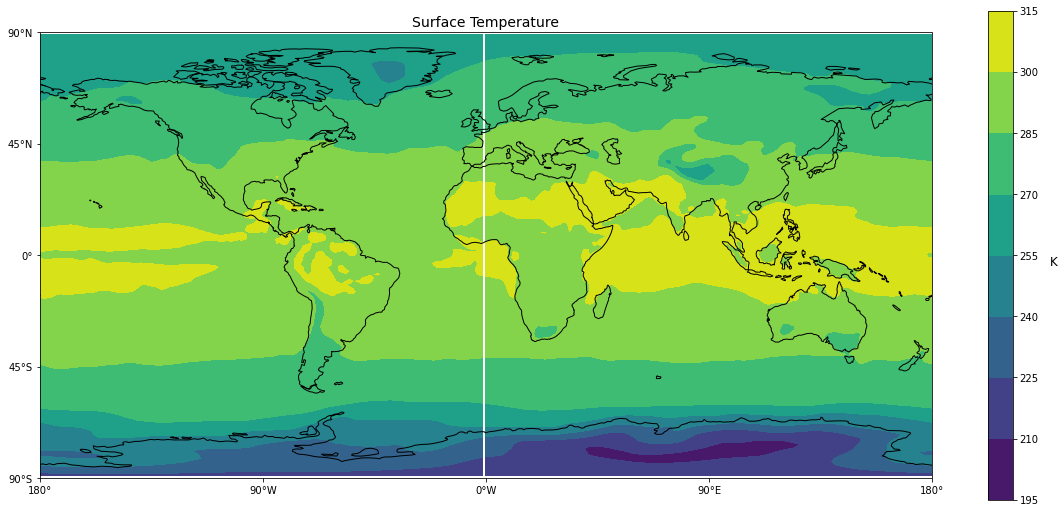

In [106]:
fig = plt.figure(figsize=(20.0, 12.0))
map_projection = ccrs.PlateCarree()
ax = fig.add_subplot(1, 1, 1, projection=map_projection)

im = ax.contourf(lons, lats, surf_temp[0,:,:], transform=map_projection)
ax.coastlines()
plt.title('Surface Temperature', size=14)
ax.set_xticks(np.linspace(-180, 180, 5), crs=map_projection)
ax.set_yticks(np.linspace(-90, 90, 5), crs=map_projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

cb = fig.colorbar(im, orientation='vertical', shrink=0.75)
cb.set_label('K',size=12,rotation=0,labelpad=15)

ax.set_global()
plt.show()

# Save the plot as a PNG image

fig.savefig('surf_temp_1.png', format='png', dpi=360)

**Plot Zonal Mean Height of Wind**

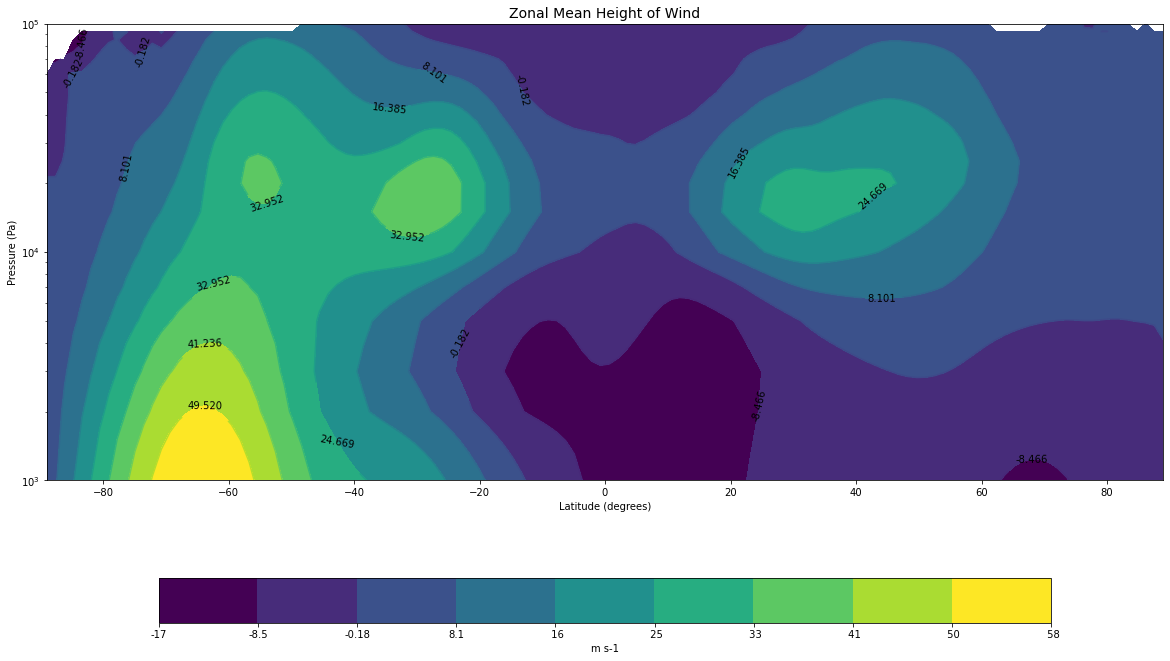

In [107]:
# Compute the zonal mean height
zonal_mean_height = np.mean(uwind[0,:,:,:], axis=2)

# Select contour levels
ncountours = 10
fac = 0.005
min_val = (1.0-fac)*np.min(zonal_mean_height)
max_val = (1.0+fac)*np.max(zonal_mean_height)
clevs = np.linspace(min_val, max_val, ncountours)

fig = plt.figure(figsize=(20.0, 12.0))
ax = fig.add_subplot(1, 1, 1)

# Add Title
plt.title('Zonal Mean Height of Wind', size= 14)

# map contour values to colors
norm=matplotlib.colors.BoundaryNorm(clevs, ncolors=256, clip=False)
    
# draw the contours with contour labels
CS = ax.contour(lats, levs, zonal_mean_height, levels=clevs)
ax.clabel(CS,inline=1, fontsize=10, colors='black')

# draw the (filled) contours
contour = ax.contourf(lats, levs, zonal_mean_height, levels=clevs, norm=norm)

# Draw colorbar
fmt = matplotlib.ticker.FormatStrFormatter("%3.2g")
cbar = fig.colorbar(contour, ax=ax, orientation='horizontal', shrink=0.8,
                    ticks=clevs, format=fmt)
cbar.set_label('m s-1')

ax.set_yscale('log')
ax.set_xlabel("Latitude (degrees)")
ax.set_ylabel("Pressure (Pa)")
plt.show()

# Save plot as a PNG image
fig.savefig('zonal_mean_height_wind.png', format='png', dpi=360)